In [2]:
import pandas as pd
import numpy as np

df=pd.read_excel("DadRegLis2.xlsx", sheet_name="exer12")
df.head()

,y,x1,x2,x3,x4
0,29,33,53,3.32,3.42
1,24,31,36,3.10,3.26
2,26,33,51,3.18,3.18
3,22,37,51,3.39,3.08
4,27,36,54,3.20,3.41


In [3]:
df.describe()

,y,x1,x2,x3,x4
count,32.000000,32.000000,32.000000,32.000000,32.00000
mean,31.125000,57.906250,55.906250,4.422187,4.32375
std,9.369649,19.510724,15.732357,1.452239,1.39171
min,16.000000,31.000000,35.000000,2.590000,2.59000
25%,23.750000,37.000000,41.000000,3.290000,3.37250
50%,31.500000,60.000000,60.000000,4.285000,4.09000
75%,34.500000,62.000000,62.000000,4.630000,4.54000
max,55.000000,92.000000,92.000000,7.450000,7.45000


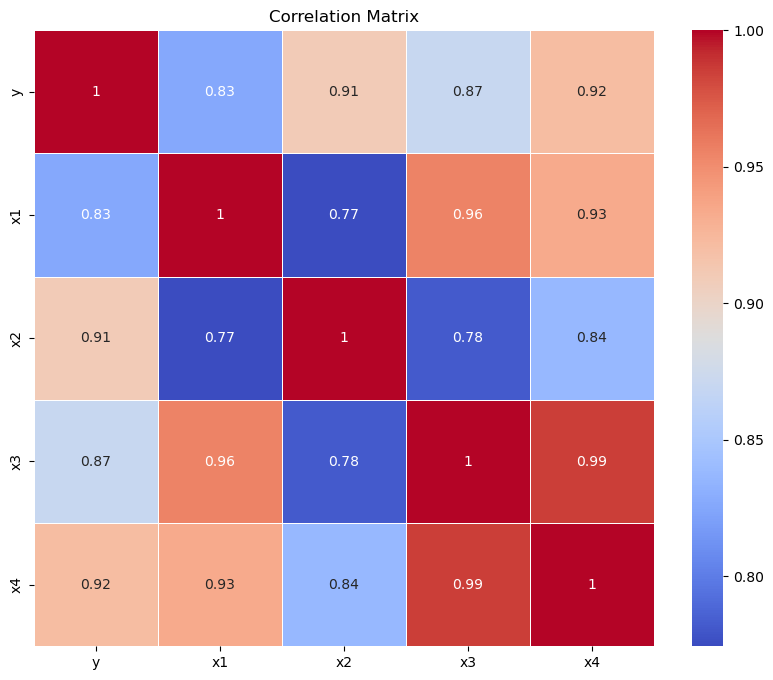

c:\Users\hugog\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


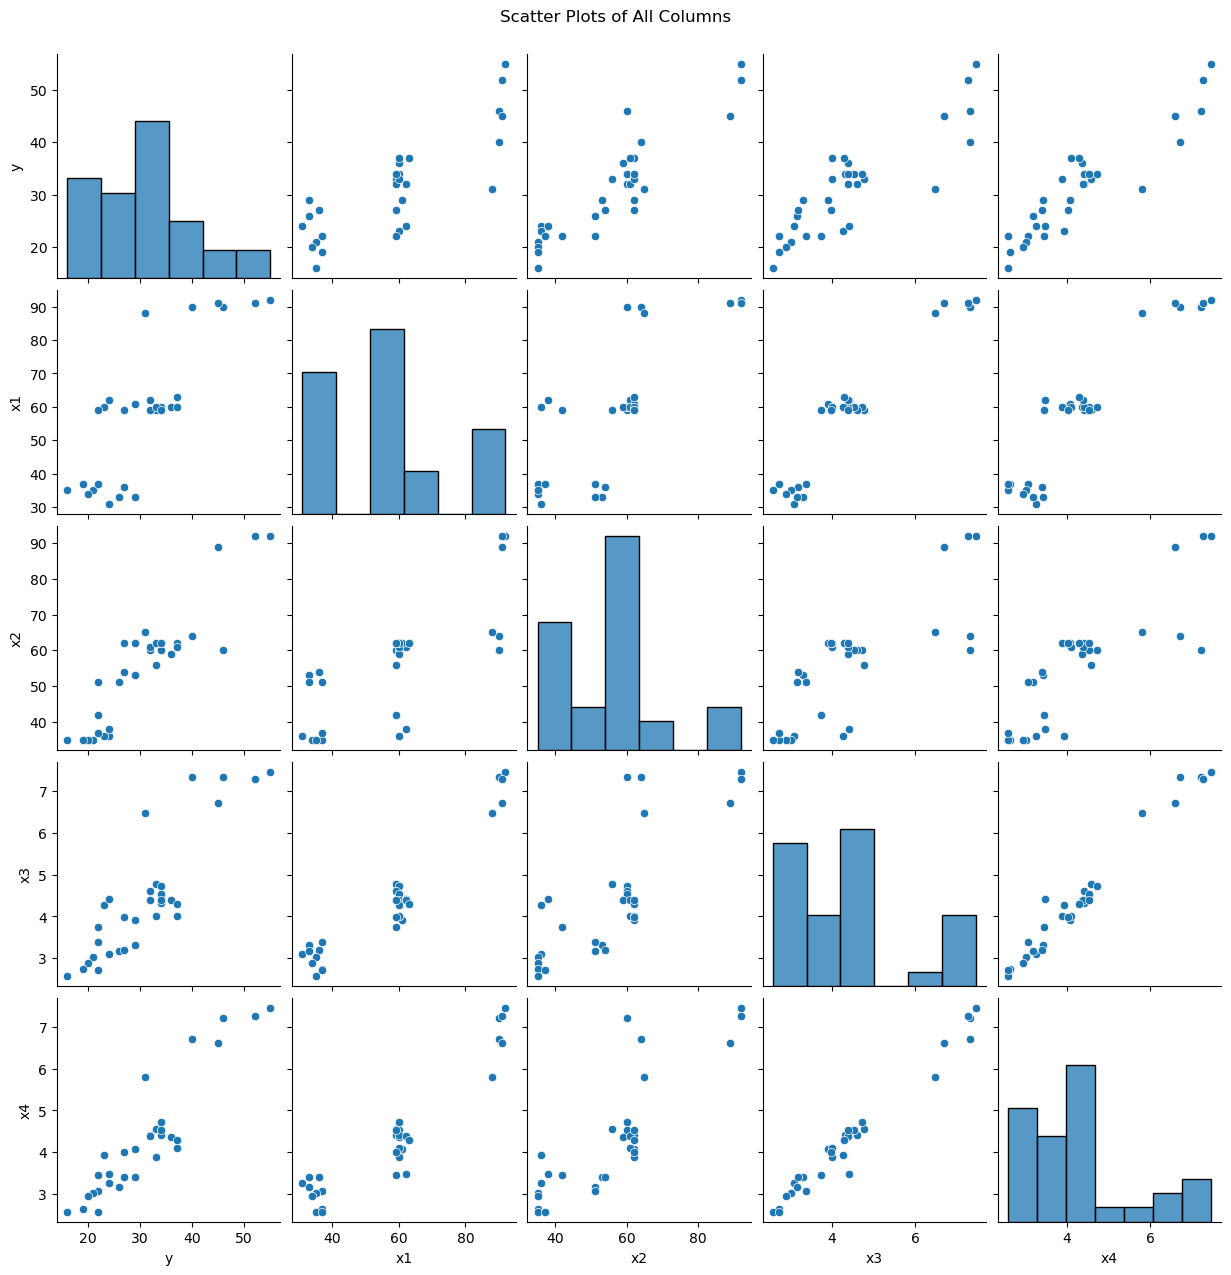

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plotting scatter plots for all pairs of columns
sns.pairplot(df)
plt.suptitle('Scatter Plots of All Columns', y=1.02)
plt.show()

# Exercise 12

## a)

C:\Users\hugog\AppData\Local\Temp\ipykernel_19180\2387551024.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


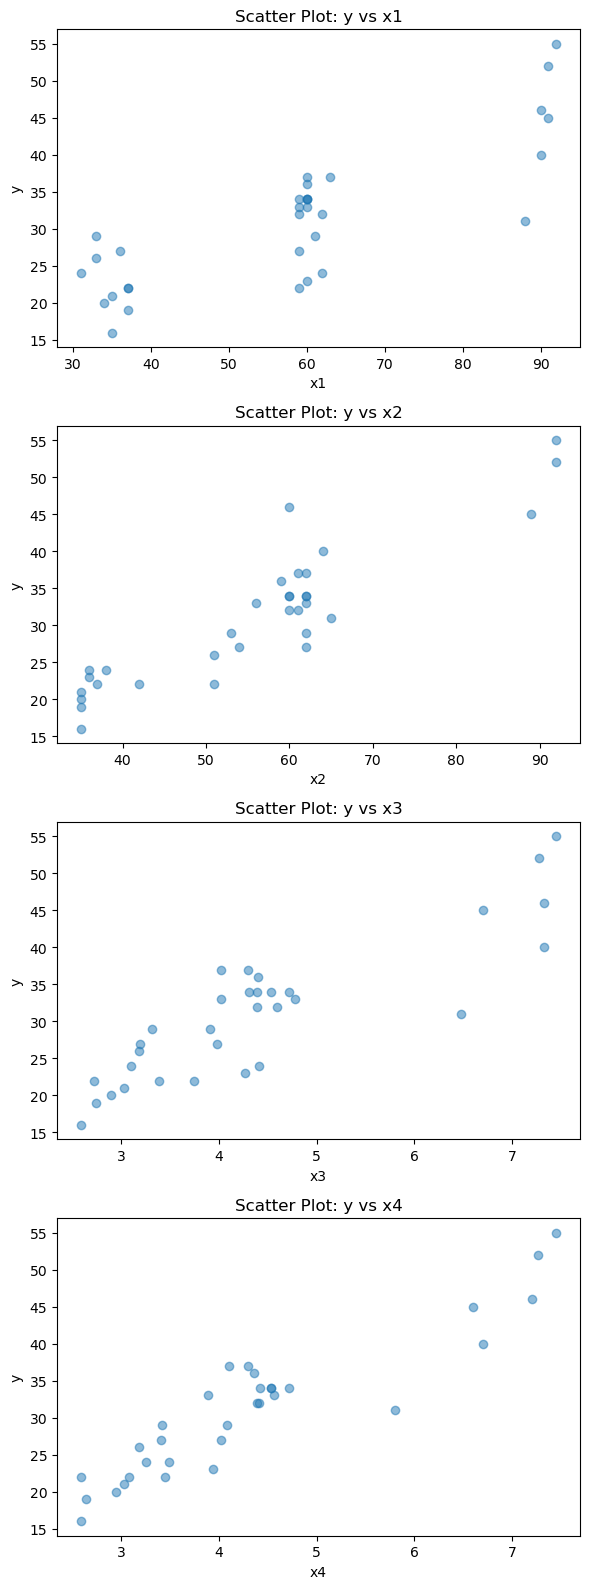

In [5]:
y_column = 'y'
columns_to_plot = [col for col in df.columns if col != y_column]

plt.figure(figsize=(6, len(columns_to_plot) * 4))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.scatter(df[column], df[y_column], alpha=0.5)
    plt.title(f'Scatter Plot: {y_column} vs {column}')
    plt.xlabel(column)
    plt.ylabel(y_column)
    plt.tight_layout()

plt.show()

## b)

In [6]:
import statsmodels.api as sm

y = df['y']  
X = df.drop(columns=['y'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     84.54
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           7.25e-15
Time:                        15:24:37   Log-Likelihood:                -74.825
No. Observations:                  32   AIC:                             159.7
Df Residuals:                      27   BIC:                             167.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0150      1.861      0.545      0.5

The coefficients for x1 and x3 deviate from our expectations based on the scatter plots results. This is likely due to the fact that there is multicolinearity in the model, negatively affecting the correct estimations of the beta values. 

## c)

In [7]:
cov_beta = model.cov_params()
print("Covariance matrix of estimated betas:")
print(cov_beta)

Covariance matrix of estimated betas:
          const        x1        x2        x3        x4
const  3.464469  0.014493 -0.063836 -1.161979  1.072333
x1     0.014493  0.008209 -0.001926 -0.163025  0.078352
x2    -0.063836 -0.001926  0.004586  0.103904 -0.125006
x3    -1.161979 -0.163025  0.103904  8.128015 -7.204481
x4     1.072333  0.078352 -0.125006 -7.204481  7.687485


In [8]:
std_errors = np.array(model.bse)
correlation_matrix = cov_beta / (std_errors[:, None] @ std_errors[None, :])

print("Correlation matrix of estimated betas:")
print(correlation_matrix)

Correlation matrix of estimated betas:
          const        x1        x2        x3        x4
const  1.000000  0.085943 -0.506457 -0.218972  0.207787
x1     0.085943  1.000000 -0.313912 -0.631140  0.311905
x2    -0.506457 -0.313912  1.000000  0.538191 -0.665784
x3    -0.218972 -0.631140  0.538191  1.000000 -0.911419
x4     0.207787  0.311905 -0.665784 -0.911419  1.000000


When there is no multicollinearity, the correlation values among the betas ought to be close to 0. Given the high values in the correlation matrix (e.g., -0.506457, -0.911419, -0.665784, and -0.631140), we can fairly confidently affirm that the model suffers from multicollinearity

## d)

In [9]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     84.54
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           7.25e-15
Time:                        15:24:37   Log-Likelihood:                -74.825
No. Observations:                  32   AIC:                             159.7
Df Residuals:                      27   BIC:                             167.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0150      1.861      0.545      0.5

Both R-Squared and Adj. R-Squared values are considerably high, showing the high predictive power of the model

## e)

In [10]:
model.f_pvalue

7.248720130961356e-15

Given the p-value for the F-test, we can confidently reject the null hypothesis

## f)

In [11]:
hypothesis_test = 'x1 = 0, x3 = 0'  
f_test_result = model.f_test(hypothesis_test)

print(f_test_result)

<F test: F=2.4929203504497526, p=0.10150347745177783, df_denom=27, df_num=2>


The p-values is not small enough (i.e., not smaller than the standard threshold of 0.05) for us to reject the null hypothesis. Hence, we could affirm that $\beta_1$ and $\beta_3$ are indeed equal to zero

## g)

In [12]:
p_values = model.pvalues

print("Individual t-tests p-values for each coefficient:")
print(p_values)

Individual t-tests p-values for each coefficient:
const    0.590007
x1       0.754608
x2       0.003615
x3       0.141319
x4       0.003190
dtype: float64


Based on the results of these individual tests, we can reject the null hypothesis for $\beta_2$ and $\beta_4$

In [14]:
from statsmodels.stats.multitest import multipletests

alpha = 0.05  # Global significance level
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')

print("\nAdjusted p-values after Bonferroni correction:")
print(pvals_corrected)

# Conclusion for each test
for i, (rej, pval) in enumerate(zip(reject, pvals_corrected)):
    print(f"Test for beta_{i}: {'Reject H0' if rej else 'Fail to reject H0'}, p-value (adjusted) = {pval:.4f}")


Adjusted p-values after Bonferroni correction:
[1.         1.         0.01807686 0.70659433 0.01594768]
Test for beta_0: Fail to reject H0, p-value (adjusted) = 1.0000
Test for beta_1: Fail to reject H0, p-value (adjusted) = 1.0000
Test for beta_2: Reject H0, p-value (adjusted) = 0.0181
Test for beta_3: Fail to reject H0, p-value (adjusted) = 0.7066
Test for beta_4: Reject H0, p-value (adjusted) = 0.0159


Based on the results of these individual tests, we can again reject the null hypothesis for $\beta_2$ and $\beta_4$. Though the conclusions remain the same, performing such an adjustment is important

## h)

In [18]:
from scipy.stats import norm, t

# Extract relevant statistics
beta2_est = model.params[2]  # Estimated value of beta2
se_beta2 = model.bse[2]      # Standard error of beta2

# Given values
beta2_true = 0.5  # The true value of beta2 under the alternative hypothesis
sigma_squared = 7.5
sigma = np.sqrt(sigma_squared)

# Degrees of freedom for the t-test
n = len(y)  # Sample size
k = len(X.columns)  # Number of predictors including the intercept
df_residual = n - k  # Degrees of freedom

# Calculate (X'X)^(-1) to find g_jj for beta2
XtX_inv = np.linalg.inv(np.dot(X.T, X))
g_jj = XtX_inv[2, 2]  # Select the (j+1)-th element from the diagonal for beta2 (j=1 means index 2)

# Compute the standard error for beta2 using the true sigma
se_beta2 = sigma * np.sqrt(g_jj)

# Calculate the critical t-value for a two-tailed test at alpha = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=df_residual)  # Two-tailed test, hence alpha/2

# Calculate the non-centrality parameter
ncp = (beta2_true - 0) / se_beta2

# Calculate the power using the t-distribution
# P(reject H0 when β2 = 0.5) = P(T > t_critical) + P(T < -t_critical)
power = 1 - (t.cdf(t_critical - ncp, df=df_residual) - t.cdf(-t_critical - ncp, df=df_residual))

print(f"Power of the test: {power:.4f}")

Power of the test: 1.0000


The power represents the probability of correctly rejecting the null hypothesis $H_0: \beta_2=0$ when the true value of $\beta_2$ is 0.5

A high power (closer to 1) means that the test is more likely to detect a true effect, whereas a low power suggests a higher chance of failing to detect an effect when it exists.

## i)

In [26]:
# Extract relevant statistics
beta2_est = model.params[2]  # Estimated value of beta2
se_beta2 = model.bse[2]      # Standard error of beta2

# Degrees of freedom for the t-test
n = len(y)  # Sample size
k = len(X.columns)  # Number of predictors including the intercept
df_residual = n - k  # Degrees of freedom

# Calculate the critical t-value for a two-tailed test at alpha = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=df_residual)  # Two-tailed test, hence alpha/2
# Calculate the non-centrality parameter
ncp = (beta2_est - 0) / se_beta2


t.cdf(t_critical - ncp, df=df_residual)


0.13314178216792058

In [31]:
# Extract the estimated value and standard error of beta2
beta2_est = model.params[2]  # Estimated coefficient for beta2
se_beta2 = model.bse[2]      # Standard error for beta2

# Calculate the t-statistic for beta2
t_stat = beta2_est / se_beta2

# Degrees of freedom for the t-test
df_residual = model.df_resid

# Calculate the one-tailed p-value for the test H0: β2 = 0 vs H1: β2 > 0
p_value = 1 - t.cdf(t_stat, df=df_residual)

# Calculate the one-tailed p-value for the test H0: β2 = 0 vs H1: β2 > 0
p_value = 1 - t.cdf(ncp, df=df_residual)
p_value

# Define significance level
alpha = 0.05

# Output the results
print(f"t-statistic for beta2: {t_stat:.4f}")
print(f"One-tailed p-value: {p_value:.4f}")

# Conclusion
if p_value < alpha:
    print(f"Reject the null hypothesis H0: β2 = 0 at α = {alpha}. There is evidence that β2 > 0.")
else:
    print(f"Fail to reject the null hypothesis H0: β2 = 0 at α = {alpha}. There is not enough evidence that β2 > 0.")

t-statistic for beta2: 3.1870
One-tailed p-value: 0.0018
Reject the null hypothesis H0: β2 = 0 at α = 0.05. There is evidence that β2 > 0.


I don't know which one is correct

## j)

In [34]:
# Hypothesis 1: H01: β1 = β2 = 12β3 = 12β4
hypothesis_test_01 = 'x1 = x2, x2 = 12 * x3, x3 = x4'
f_test_result_01 = model.f_test(hypothesis_test_01)
print("Result for H01: β1 = β2 = 12β3 = 12β4")
print(f_test_result_01)
print("\n")

# Hypothesis 2: H02: β1 = β2
hypothesis_test_02 = 'x1 = x2'
f_test_result_02 = model.f_test(hypothesis_test_02)
print("Result for H02: β1 = β2")
print(f_test_result_02)
print("\n")

# Hypothesis 3: H03: β2 = 12β3
hypothesis_test_03 = 'x2 = 12 * x3'
f_test_result_03 = model.f_test(hypothesis_test_03)
print("Result for H03: β2 = 12β3")
print(f_test_result_03)
print("\n")

# Hypothesis 4: H04: β3 = β4
hypothesis_test_04 = 'x3 = x4'
f_test_result_04 = model.f_test(hypothesis_test_04)
print("Result for H04: β3 = β4")
print(f_test_result_04)
print("\n")

# Hypothesis 5: H05: β1 = β2 and β3 = β4
hypothesis_test_05 = 'x1 = x2, x3 = x4'
f_test_result_05 = model.f_test(hypothesis_test_05)
print("Result for H05: β1 = β2 and β3 = β4")
print(f_test_result_05)

Result for H01: β1 = β2 = 12β3 = 12β4
<F test: F=10.569827357594336, p=8.98952732645128e-05, df_denom=27, df_num=3>


Result for H02: β1 = β2
<F test: F=3.589025678824931, p=0.06892010097541647, df_denom=27, df_num=1>


Result for H03: β2 = 12β3
<F test: F=2.320205694241221, p=0.1393309989854951, df_denom=27, df_num=1>


Result for H04: β3 = β4
<F test: F=5.848092861613001, p=0.02261251147839535, df_denom=27, df_num=1>


Result for H05: β1 = β2 and β3 = β4
<F test: F=13.840047062024777, p=7.289804715140122e-05, df_denom=27, df_num=2>


Given the results, we fail to reject hypothesis $H_2$ and $H_3$

In [36]:
# Hypothesis 3: H06: β2 = 12β3
hypothesis_test_06 = 'x1 = 12 * x3'
f_test_result_06 = model.f_test(hypothesis_test_06)
print("Result for H06: β2 = 12β3")
print(f_test_result_06)
print("\n")


Result for H06: β2 = 12β3
<F test: F=2.2859226600508955, p=0.14216982503612483, df_denom=27, df_num=1>




The additional Hypothesis further strengths the hypothesis that $\beta_1=\beta_2=12\beta_3$ but $\beta_3=/=\beta_4$

## k)

In [37]:
# Number of coefficients we're interested in (excluding the intercept if present)
num_coeffs = 4  # We want intervals for β1, β2, β3, and β4

# Desired global confidence level
global_confidence_level = 0.95

# Calculate the individual confidence level using Bonferroni correction
alpha = 1 - global_confidence_level
individual_alpha = alpha / num_coeffs
individual_conf_level = 1 - individual_alpha

# Degrees of freedom for the t-distribution
df_residual = model.df_resid

# Calculate the critical t-value for the adjusted confidence level
t_critical = t.ppf(1 - individual_alpha / 2, df=df_residual)

# Extract the coefficients and standard errors
coefficients = model.params[1:5]  # Select only β1 to β4 (excluding the intercept if present)
standard_errors = model.bse[1:5]  # Select corresponding standard errors

# Construct the Bonferroni-adjusted confidence intervals
conf_intervals = []
for i in range(len(coefficients)):
    lower_bound = coefficients[i] - t_critical * standard_errors[i]
    upper_bound = coefficients[i] + t_critical * standard_errors[i]
    conf_intervals.append((lower_bound, upper_bound))

# Display the results
for j in range(1, 5):
    print(f"Bonferroni-adjusted confidence interval for β{j}: ({conf_intervals[j-1][0]:.4f}, {conf_intervals[j-1][1]:.4f})")

Bonferroni-adjusted confidence interval for β1: (-0.2711, 0.2139)
Bonferroni-adjusted confidence interval for β2: (0.0346, 0.3970)
Bonferroni-adjusted confidence interval for β3: (-11.9500, 3.3099)
Bonferroni-adjusted confidence interval for β4: (1.5546, 16.3952)


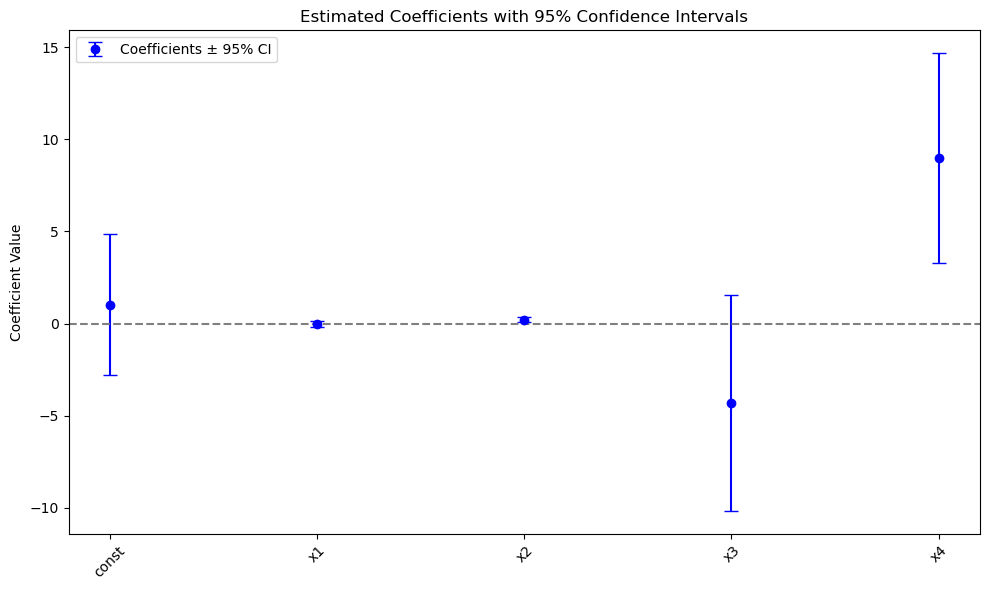

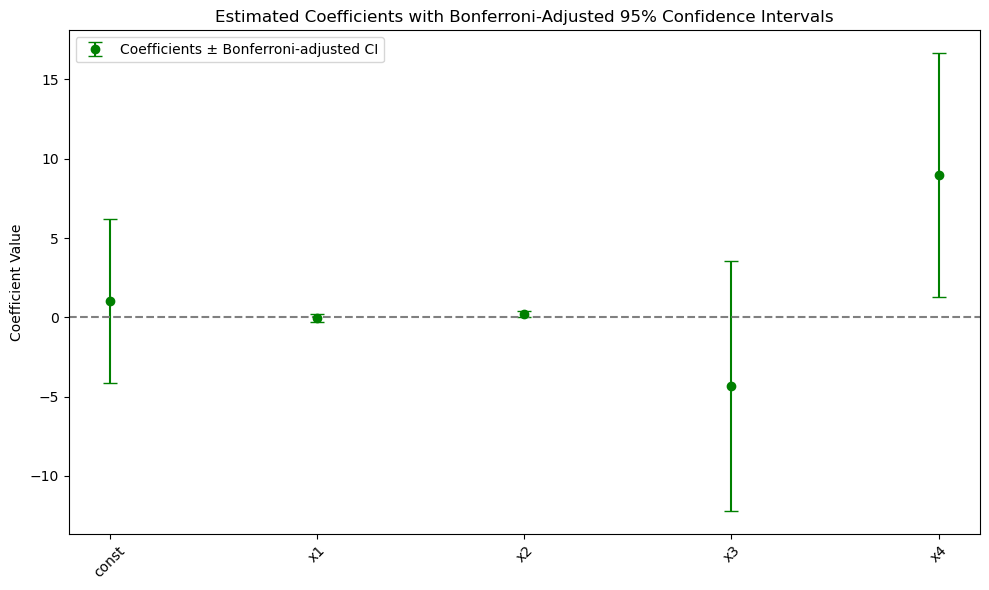

In [38]:
# Visualizing the coefficients with confidence intervals
conf_intervals = model.conf_int(alpha=0.05)
coefficients = model.params

plt.figure(figsize=(10, 6))
plt.errorbar(conf_intervals.index, coefficients, 
             yerr=[coefficients - conf_intervals[0], conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='blue', label='Coefficients ± 95% CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()


# Applying Bonferroni adjustment to the confidence intervals
# Calculate the Bonferroni-adjusted alpha level
adjusted_alpha = alpha / len(coefficients)  # Bonferroni adjustment divides alpha by the number of tests

# Calculate the Bonferroni-adjusted confidence intervals
bonferroni_conf_intervals = model.conf_int(alpha=adjusted_alpha)

# Visualizing the coefficients with Bonferroni-adjusted confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(bonferroni_conf_intervals.index, coefficients, 
             yerr=[coefficients - bonferroni_conf_intervals[0], bonferroni_conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='green', label='Coefficients ± Bonferroni-adjusted CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with Bonferroni-Adjusted 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()

## l)

In [39]:
# Given new data point x0 = (1, 60, 60, 4, 4)^T
x0 = np.array([1, 60, 60, 4, 4])  # Including the intercept (1 as the first element)

# Predict the mean response at x0
y0_hat = model.predict(x0)

# Degrees of freedom for the residuals
df_residual = model.df_resid

# Estimate the variance of the residuals
s_squared = np.sum(model.resid ** 2) / df_residual
s = np.sqrt(s_squared)  # Standard error of the residuals

# Calculate (X'X)^(-1)
XtX_inv = np.linalg.inv(np.dot(X.T, X))

# Calculate the standard error of the mean prediction
se_mean_prediction = np.sqrt(np.dot(np.dot(x0.T, XtX_inv), x0))

# Calculate the critical t-value for the 95% confidence level
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=df_residual)

# Confidence Interval for E(y0)
ci_lower_mean = y0_hat - t_critical * se_mean_prediction
ci_upper_mean = y0_hat + t_critical * se_mean_prediction

print(f"95% Confidence interval for E(y0): ({ci_lower_mean[0]:.4f}, {ci_upper_mean[0]:.4f})")

# Prediction Interval for a new observation y0
se_prediction = np.sqrt(se_mean_prediction**2 + s_squared)

pi_lower = y0_hat - t_critical * se_prediction
pi_upper = y0_hat + t_critical * se_prediction

print(f"95% Prediction interval for a new observation y0: ({pi_lower[0]:.4f}, {pi_upper[0]:.4f})")

95% Confidence interval for E(y0): (30.2151, 31.5186)
95% Prediction interval for a new observation y0: (25.2276, 36.5061)


## m)

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     84.54
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           7.25e-15
Time:                        16:42:40   Log-Likelihood:                -74.825
No. Observations:                  32   AIC:                             159.7
Df Residuals:                      27   BIC:                             167.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0150      1.861      0.545      0.590      -2.804       4.834
x1            -0.0286      0.091     -0.316      0.755      -0.215       0.157
x2             0.2158      0.068      3.187      0.004       0.077       0.355
x3            -4.3201      2.851     -1.515      0.141     -10.170       1.530
x4             8.9749      2.773      3.237      0.003       3.286      14.664
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.047
Skew:                           0.019   Prob(JB):                        0.977
Kurtosis:                       2.817   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

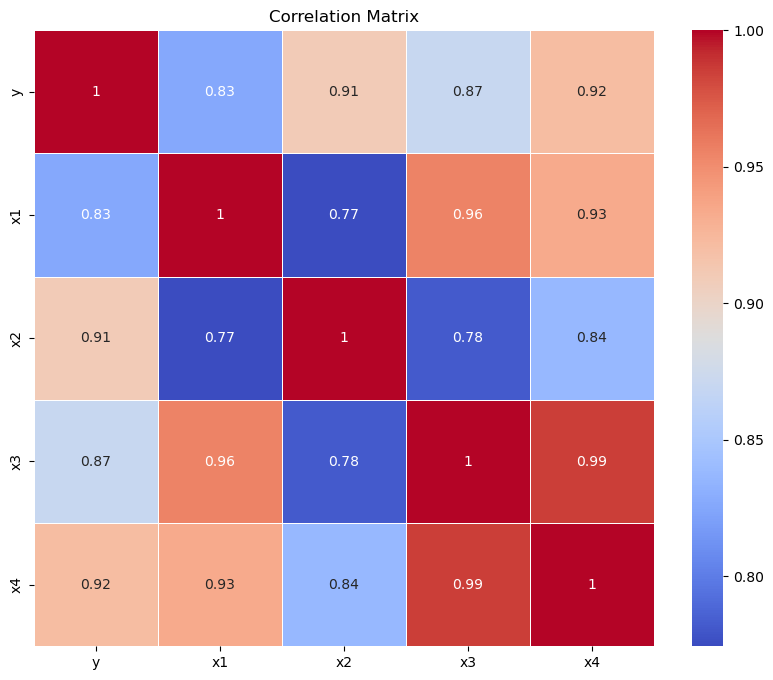

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [82]:
y = df['y']  
X = df.drop(columns=['y', 'x1', 'x3'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     151.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           4.63e-16
Time:                        16:57:11   Log-Likelihood:                -77.537
No. Observations:                  32   AIC:                             161.1
Df Residuals:                      29   BIC:                             165.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1918      1.903      0.101      0.920      -3.700       4.083
x2             0.2747      0.060      4.587      0.000       0.152       0.397
x4             3.6020      0.677      5.320      0.000       2.217       4.987
==============================================================================
Omnibus:                        3.833   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                2.378
Skew:                          -0.574   Prob(JB):                        0.305
Kurtosis:                       3.681   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

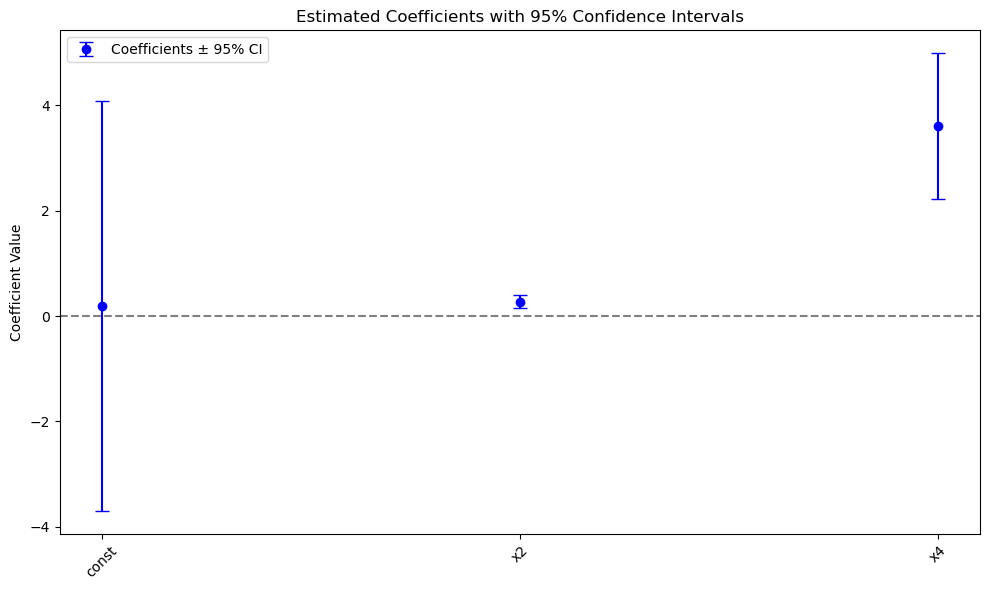

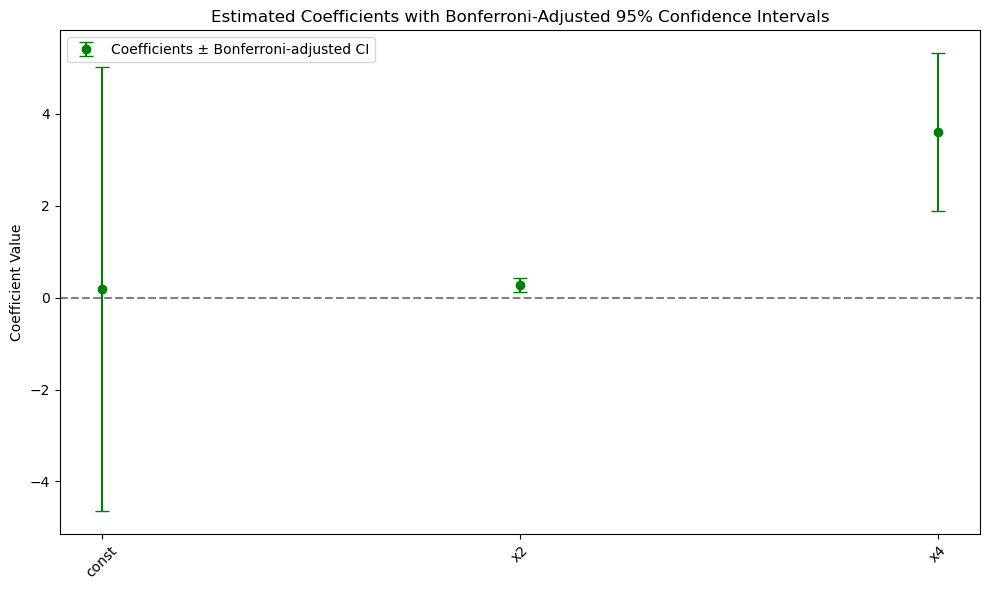

In [45]:
# Visualizing the coefficients with confidence intervals
conf_intervals = model.conf_int(alpha=0.05)
coefficients = model.params

plt.figure(figsize=(10, 6))
plt.errorbar(conf_intervals.index, coefficients, 
             yerr=[coefficients - conf_intervals[0], conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='blue', label='Coefficients ± 95% CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()


# Applying Bonferroni adjustment to the confidence intervals
# Calculate the Bonferroni-adjusted alpha level
adjusted_alpha = alpha / len(coefficients)  # Bonferroni adjustment divides alpha by the number of tests

# Calculate the Bonferroni-adjusted confidence intervals
bonferroni_conf_intervals = model.conf_int(alpha=adjusted_alpha)

# Visualizing the coefficients with Bonferroni-adjusted confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(bonferroni_conf_intervals.index, coefficients, 
             yerr=[coefficients - bonferroni_conf_intervals[0], bonferroni_conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='green', label='Coefficients ± Bonferroni-adjusted CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with Bonferroni-Adjusted 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()

# n)

In [54]:
cov_beta = model.cov_params()
print("Covariance matrix of estimated betas:")
print(cov_beta)

Covariance matrix of estimated betas:
          const        x2        x4
const  3.620607 -0.053714 -0.083442
x2    -0.053714  0.003587 -0.033961
x4    -0.083442 -0.033961  0.458412


In [55]:
std_errors = np.array(model.bse)
correlation_matrix = cov_beta / (std_errors[:, None] @ std_errors[None, :])

print("Correlation matrix of estimated betas:")
print(correlation_matrix)

Correlation matrix of estimated betas:
          const        x2        x4
const  1.000000 -0.471317 -0.064769
x2    -0.471317  1.000000 -0.837464
x4    -0.064769 -0.837464  1.000000


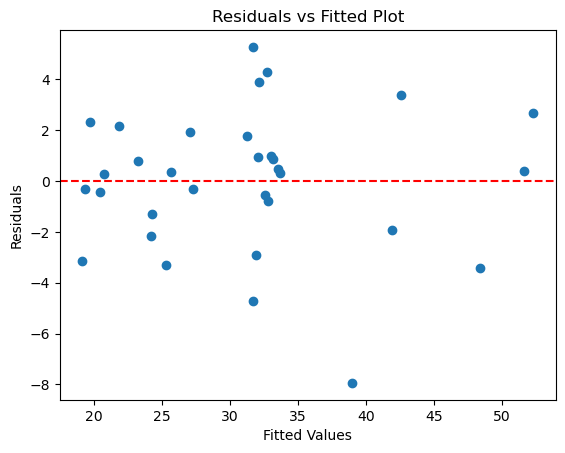

In [56]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

The residuals seem quite random, which indicates that the model captures the relationship well, suggesting linearity and constant variance (homoscedasticity).

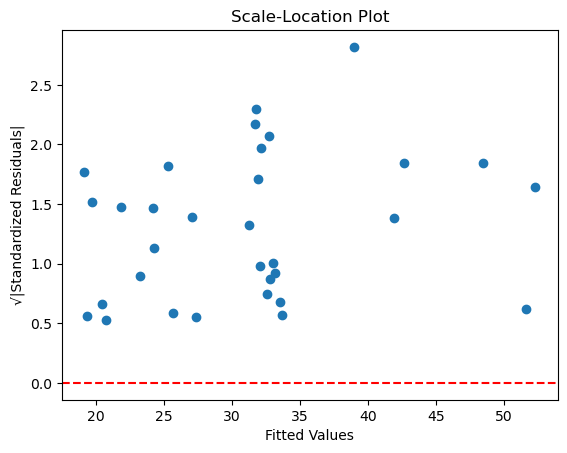

In [57]:
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot')
plt.show()

The Scale-Location Plot also suggests homoscedasticity

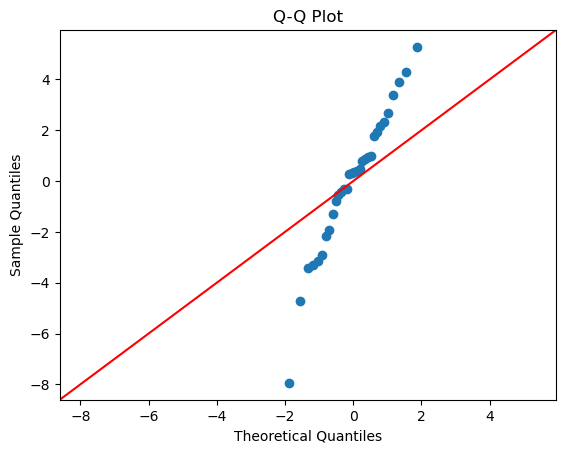

In [58]:
import scipy.stats as stats

sm.qqplot(model.resid, line='45')
plt.title('Q-Q Plot')
plt.show()

The Q-Q plot indicates departures from normality, which can affect statistical tests.

In [83]:
from scipy.stats import shapiro

shapiro_test = shapiro(model.resid)
print(f'Shapiro-Wilk test statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}')

if shapiro_test.pvalue < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals appear to be normally distributed.")


Shapiro-Wilk test statistic: 0.9714, p-value: 0.5392
Fail to reject the null hypothesis: Residuals appear to be normally distributed.


In [84]:
from scipy.stats import anderson

anderson_test = anderson(model.resid, dist='norm')
print(f'Anderson-Darling test statistic: {anderson_test.statistic:.4f}')
print("Critical values and significance levels:")

for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    print(f'Significance level: {sl}%, Critical value: {cv}')
    if anderson_test.statistic > cv:
        print(f"Reject the null hypothesis at the {sl}% significance level: Residuals are not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis at the {sl}% significance level.")


Anderson-Darling test statistic: 0.3210
Critical values and significance levels:
Significance level: 15.0%, Critical value: 0.523
Fail to reject the null hypothesis at the 15.0% significance level.
Significance level: 10.0%, Critical value: 0.596
Fail to reject the null hypothesis at the 10.0% significance level.
Significance level: 5.0%, Critical value: 0.715
Fail to reject the null hypothesis at the 5.0% significance level.
Significance level: 2.5%, Critical value: 0.834
Fail to reject the null hypothesis at the 2.5% significance level.
Significance level: 1.0%, Critical value: 0.992
Fail to reject the null hypothesis at the 1.0% significance level.


In [85]:
from scipy.stats import jarque_bera

jb_test = jarque_bera(model.resid)
print(f'Jarque-Bera test statistic: {jb_test.statistic:.4f}, p-value: {jb_test.pvalue:.4f}')

if jb_test.pvalue < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals appear to be normally distributed.")


Jarque-Bera test statistic: 2.3777, p-value: 0.3046
Fail to reject the null hypothesis: Residuals appear to be normally distributed.


Yet, the statistical tests shows that the residuals likely follow a normal distribution

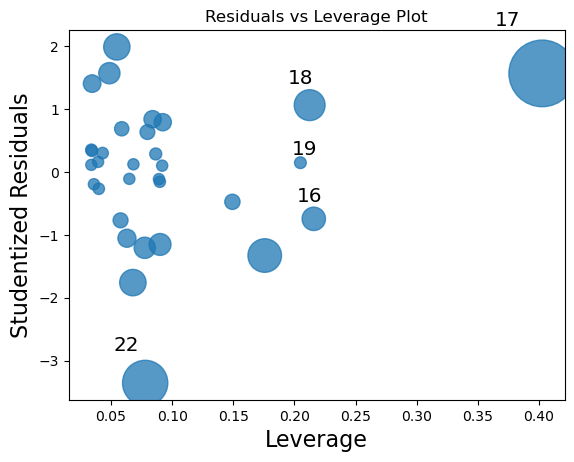

In [59]:
sm.graphics.influence_plot(model, criterion="cooks")
plt.title('Residuals vs Leverage Plot')
plt.show()

Observation 17 could be considered an influential observation, which might unduly affect the model.

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature        VIF
0   const  14.094438
1      x2   3.348354
2      x4   3.348354


C:\Users\hugog\AppData\Local\Temp\ipykernel_19180\1607974514.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


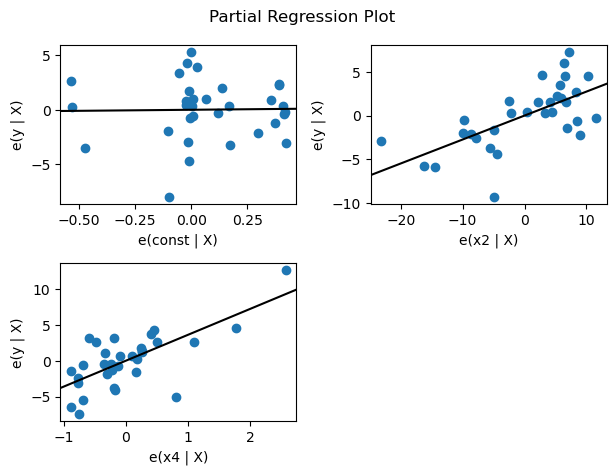

In [73]:
sm.graphics.plot_partregress_grid(model)
plt.tight_layout()
plt.show()

No apparent nonlinear patterns are visiable

In [74]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan test p-value: {bp_test[1]}')

Breusch-Pagan test p-value: 0.4616996154884636


In [75]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid, model.model.exog)
print(f'White test p-value: {white_test[1]}')

White test p-value: 0.6142447141998834


The p-values suggest homoscedasticity

alternative model to address collinearity of $x_4$ with $intercept$ and $x_2$

In [86]:
y = df['y']  
X = df.drop(columns=['y', 'x1', 'x2', 'x3'])  

#X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2215.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                    2.11e-30
Time:                        17:03:49   Log-Likelihood:                         -88.242
No. Observations:                  32   AIC:                                      178.5
Df Residuals:                      31   BIC:                                      180.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x4             7.1078      0.151     47.064      0.000       6.800       7.416
==============================================================================
Omnibus:                        4.361   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                2.823
Skew:                          -0.620   Prob(JB):                        0.244
Kurtosis:                       3.761   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

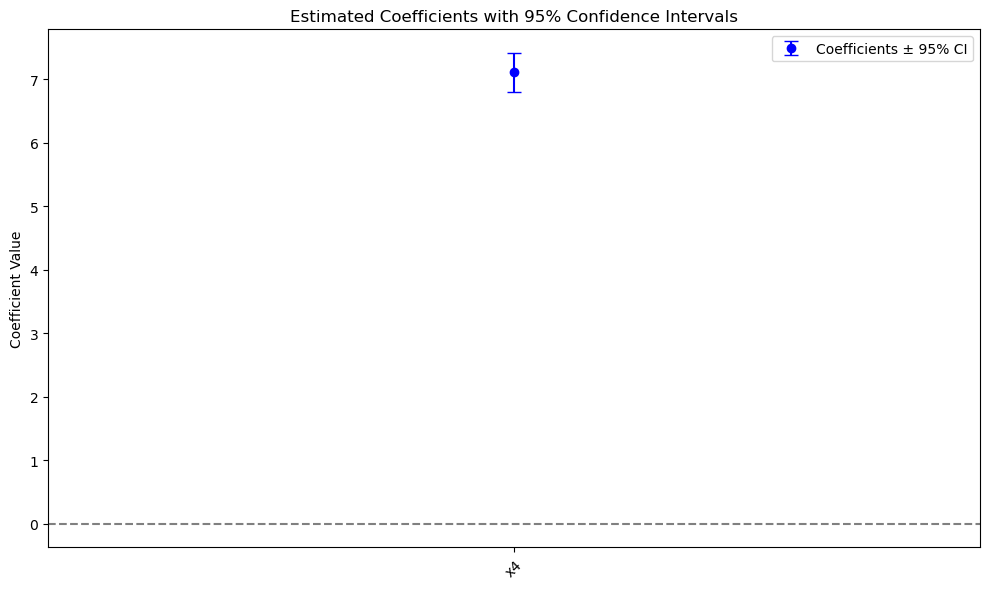

In [88]:
# Visualizing the coefficients with confidence intervals
conf_intervals = model.conf_int(alpha=0.05)
coefficients = model.params

plt.figure(figsize=(10, 6))
plt.errorbar(conf_intervals.index, coefficients, 
             yerr=[coefficients - conf_intervals[0], conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='blue', label='Coefficients ± 95% CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()

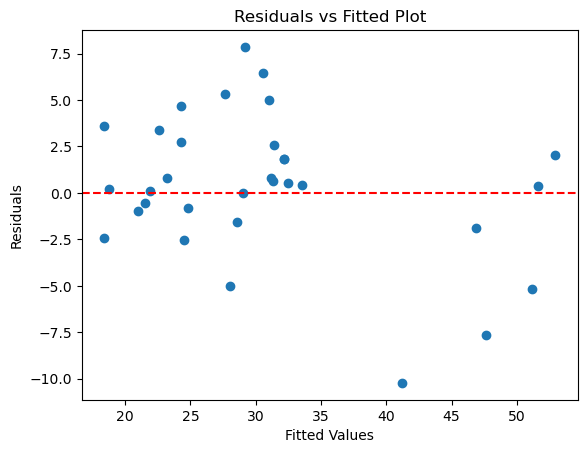

In [89]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

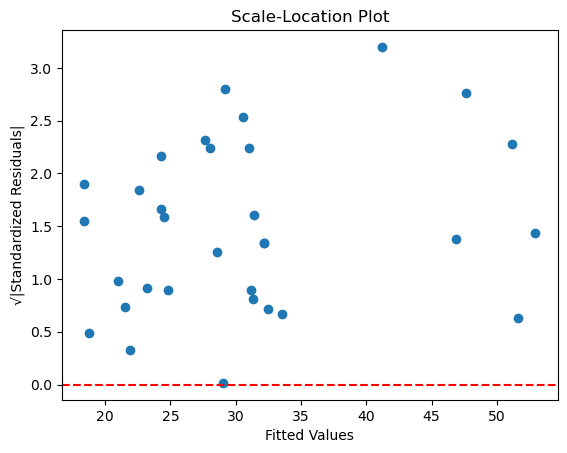

In [90]:
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot')
plt.show()

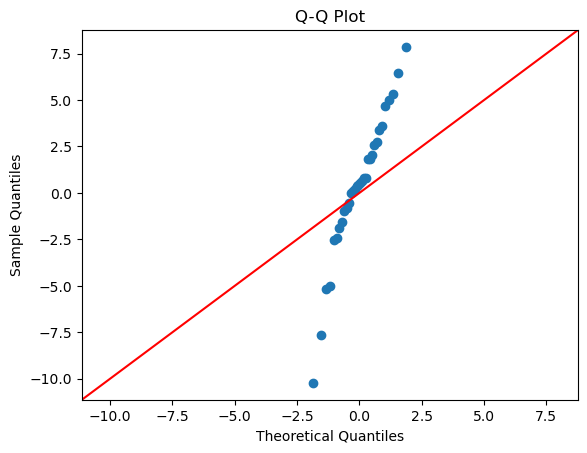

In [91]:
sm.qqplot(model.resid, line='45')
plt.title('Q-Q Plot')
plt.show()

In [92]:
from scipy.stats import shapiro

shapiro_test = shapiro(model.resid)
print(f'Shapiro-Wilk test statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}')

if shapiro_test.pvalue < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals appear to be normally distributed.")


Shapiro-Wilk test statistic: 0.9622, p-value: 0.3157
Fail to reject the null hypothesis: Residuals appear to be normally distributed.


In [93]:
from scipy.stats import anderson

anderson_test = anderson(model.resid, dist='norm')
print(f'Anderson-Darling test statistic: {anderson_test.statistic:.4f}')
print("Critical values and significance levels:")

for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    print(f'Significance level: {sl}%, Critical value: {cv}')
    if anderson_test.statistic > cv:
        print(f"Reject the null hypothesis at the {sl}% significance level: Residuals are not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis at the {sl}% significance level.")


Anderson-Darling test statistic: 0.4712
Critical values and significance levels:
Significance level: 15.0%, Critical value: 0.523
Fail to reject the null hypothesis at the 15.0% significance level.
Significance level: 10.0%, Critical value: 0.596
Fail to reject the null hypothesis at the 10.0% significance level.
Significance level: 5.0%, Critical value: 0.715
Fail to reject the null hypothesis at the 5.0% significance level.
Significance level: 2.5%, Critical value: 0.834
Fail to reject the null hypothesis at the 2.5% significance level.
Significance level: 1.0%, Critical value: 0.992
Fail to reject the null hypothesis at the 1.0% significance level.


In [94]:
from scipy.stats import jarque_bera

jb_test = jarque_bera(model.resid)
print(f'Jarque-Bera test statistic: {jb_test.statistic:.4f}, p-value: {jb_test.pvalue:.4f}')

if jb_test.pvalue < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals appear to be normally distributed.")


Jarque-Bera test statistic: 2.8226, p-value: 0.2438
Fail to reject the null hypothesis: Residuals appear to be normally distributed.


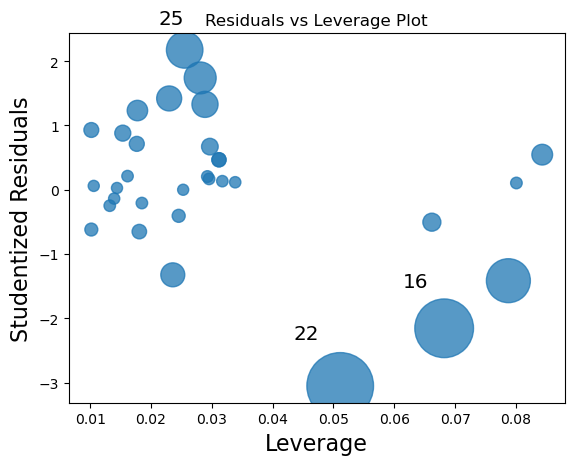

In [95]:
sm.graphics.influence_plot(model, criterion="cooks")
plt.title('Residuals vs Leverage Plot')
plt.show()